# House Prices Estimator

__Note:__ It's a competition from __Kaggle.com__ and the input data was retrieved from there.

### Details

#### Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

##### Metric

Submissions are evaluated on __Root-Mean-Squared-Error (RMSE)__ between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

#### Submission File Format

The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.

## TODO

* Use another algorithm to predict the house price
* More feature engineering
* Add more comments, thoughts, conclusions, ...
* Come up with new ideas..

## Data Analysis

In [70]:
import numpy as np
import pandas as pd

#load the files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
data = pd.concat([train, test])

#size of training dataset
train_samples = train.shape[0]

#print some of them
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [71]:
# remove the Id feature
data.drop(['Id'],1, inplace=True);

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

### First problem
* The training and test datasets have almost the __same size__.

In [73]:
print("Size training: {}".format(train.shape[0]))
print("Size testing: {}".format(test.shape[0]))

Size training: 1460
Size testing: 1459


### Selecting _only_ numeric columns (by now) 

In [74]:
datanum = data.select_dtypes([np.number])

datanum.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [124]:
data.select_dtypes(exclude=[np.number]).head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


### Find if there's null values

In [75]:
datanum.columns[datanum.isnull().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'SalePrice',
 'TotalBsmtSF']

In [76]:
#number of row without NaN
print(datanum.shape[0] - datanum.dropna().shape[0])

1798


In [77]:
#list of columns with NaN
datanum.columns[datanum.isnull().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'SalePrice',
 'TotalBsmtSF']

In [78]:
#Filling with the mean
datanum_no_nan = datanum.fillna(datanum.mean())

#check
datanum_no_nan.columns[datanum_no_nan.isnull().any()].tolist()

[]

### Normalizing

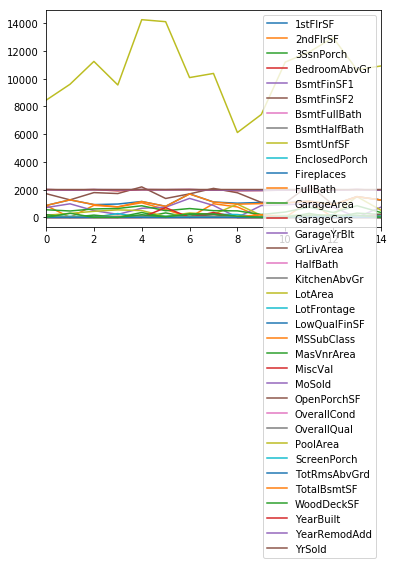

In [79]:
import matplotlib.pyplot as plt

datanum_no_nan.drop(['SalePrice'], axis=1).head(15).plot()
plt.show()

In [80]:
#Squeeze the data to [0,1]
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
columns = datanum_no_nan.columns
columns = columns.drop('SalePrice')
print("Features: {}".format(columns))

data_norm = datanum_no_nan

Features: Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


Train shape: (2919, 37)


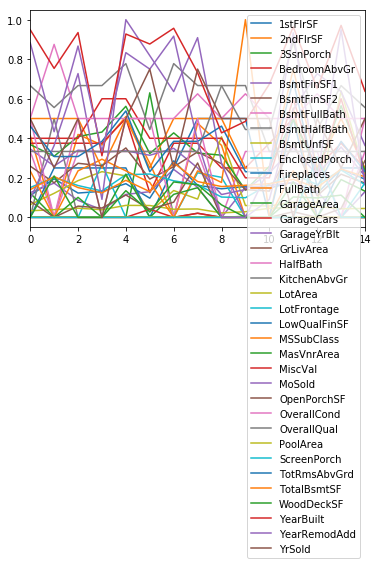

In [81]:
data_norm[columns] = scaler.fit_transform(datanum_no_nan[columns])
print("Train shape: {}".format(data_norm.shape))

data_norm.drop(['SalePrice'], axis=1).head(15).plot()
plt.show()

In [82]:
data_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,0.173405,0.082412,0.0,0.113842,0.157110,0.221277,1.0
2ndFlrSF,2919.0,0.162946,0.207604,0.0,0.000000,0.000000,0.340920,1.0
3SsnPorch,2919.0,0.005123,0.049583,0.0,0.000000,0.000000,0.000000,1.0
BedroomAbvGr,2919.0,0.357528,0.102837,0.0,0.250000,0.375000,0.375000,1.0
BsmtFinSF1,2919.0,0.078211,0.080711,0.0,0.000000,0.065379,0.129872,1.0
BsmtFinSF2,2919.0,0.032492,0.110863,0.0,0.000000,0.000000,0.000000,1.0
BsmtFullBath,2919.0,0.143298,0.174852,0.0,0.000000,0.000000,0.333333,1.0
BsmtHalfBath,2919.0,0.030682,0.122801,0.0,0.000000,0.000000,0.000000,1.0
BsmtUnfSF,2919.0,0.240057,0.188129,0.0,0.094178,0.199914,0.344606,1.0
EnclosedPorch,2919.0,0.022824,0.063482,0.0,0.000000,0.000000,0.000000,1.0


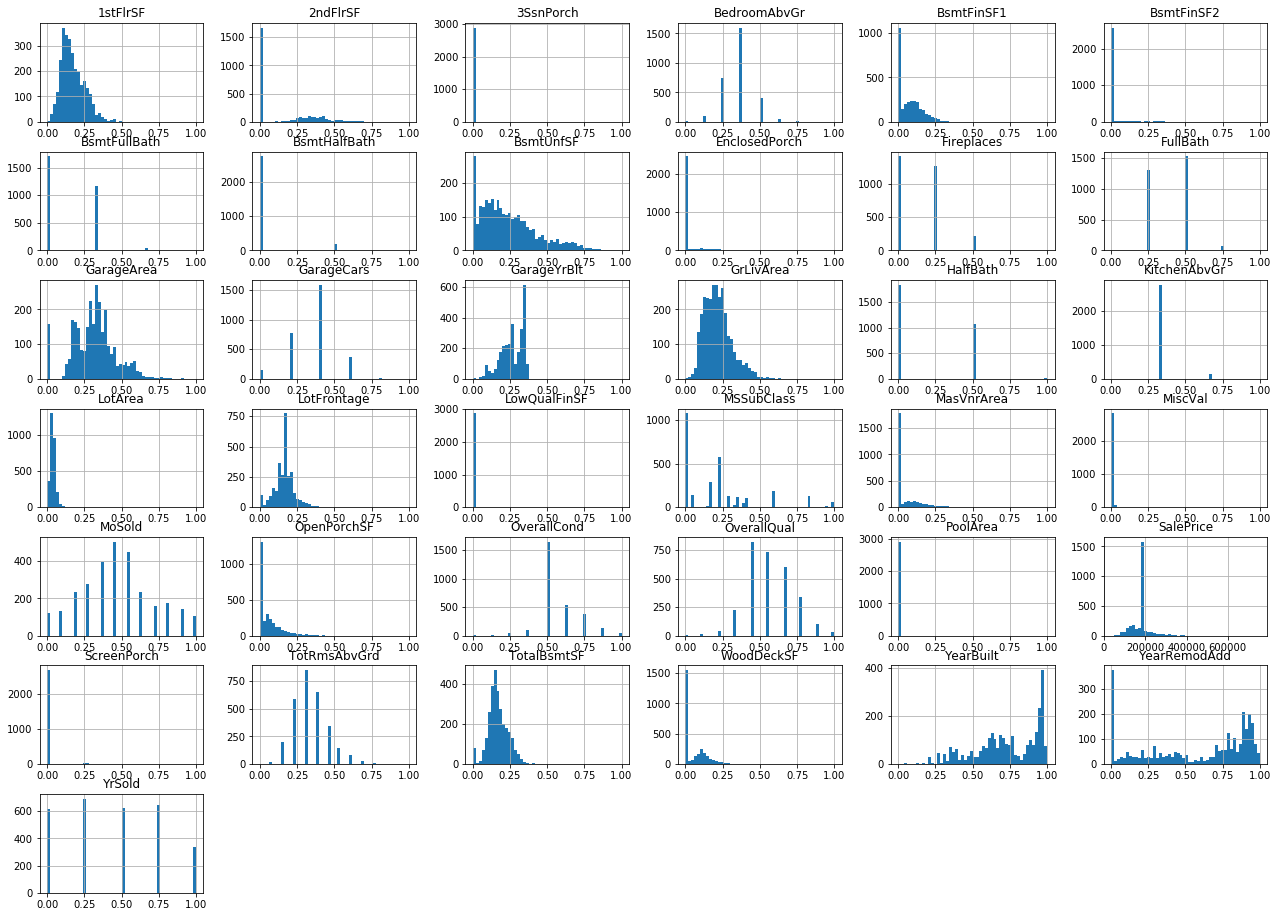

In [90]:
#plotting distributions of numeric features
data_norm.hist(bins=50, figsize=(22,16))
plt.show()

#### Using Box-Cox

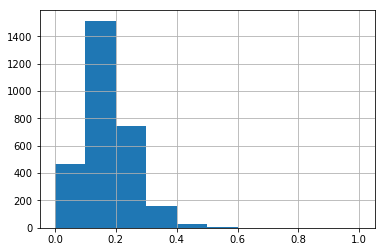

In [84]:
data_norm['1stFlrSF'].hist()
plt.show()

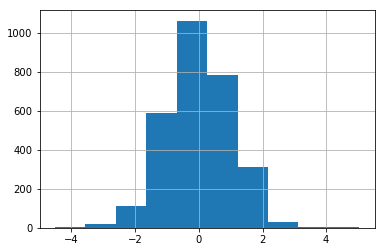

In [112]:
#transform the data so it's closest to normal
from scipy import stats

data_gauss = data_norm.copy()

for f in datanum.columns.tolist():
    data_gauss[f], _ = stats.boxcox(data_gauss[f]+0.01)

#rescale again
std_scaler = preprocessing.StandardScaler()
data_gauss[columns] = std_scaler.fit_transform(data_gauss[columns])
    
data_gauss['1stFlrSF'].hist()
plt.show()

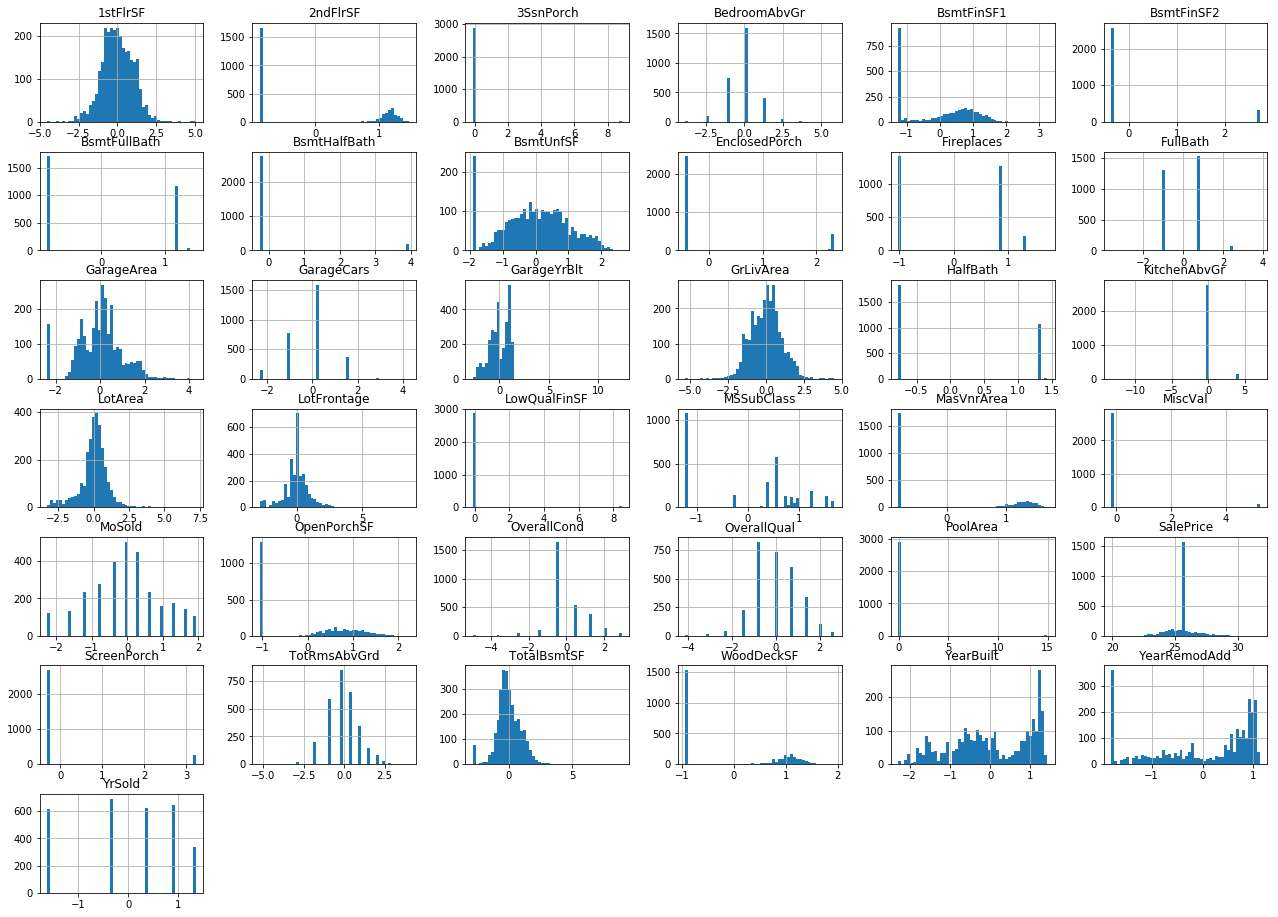

In [114]:
#plotting distributions of numeric features
data_gauss.hist(bins=50, figsize=(22,16))
plt.show()

### Splitting dataset in train and test (getting batches)

#### KFold

In [115]:
from sklearn.model_selection import KFold

y = np.array(data_norm['SalePrice'])
X = np.array(data_norm.drop('SalePrice', axis=1))

#split by idx
idx = train_samples
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

print("Shape X train: {}".format(X_train.shape))
print("Shape y train: {}".format(y_train.shape))
print("Shape X test: {}".format(X_test.shape))
print("Shape y test: {}".format(y_test.shape))

kf = KFold(n_splits=3, random_state=42, shuffle=True)
print(kf)

Shape X train: (1460, 36)
Shape y train: (1460,)
Shape X test: (1459, 36)
Shape y test: (1459,)
KFold(n_splits=3, random_state=42, shuffle=True)


### Model
#### Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

rf = MLPRegressor(activation='logistic',
                  solver='lbfgs',
                  learning_rate_init=1e-3, 
                  learning_rate='adaptive',
                  shuffle=True,
                  hidden_layer_sizes=(1200),
                  warm_start=False,
                  random_state=42,
                  verbose=True)

epoch = 1;
for train_idx, val_idx in kf.split(X_train, y_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train[train_idx], y_train[val_idx]

    #training
    rf.fit(X_t, y_t)

    #calculate costs
    t_error = mean_squared_error(y_t, rf.predict(X_t))**0.5
    v_error = mean_squared_error(y_v, rf.predict(X_v))**0.5
    print("Epoch: {} Training error: {:.2f}  Validation error: {:.2f}".format(epoch, t_error, v_error))
    epoch += 1
    
#Scores
print("Training score: {}".format(rf.score(X_train, y_train)))

Epoch: 1 Training error: 31816.52  Validation error: 40140.86


### Evaluation

It has to be used the _root mean squared error_, __RMSE__.

In [167]:
from sklearn.metrics import mean_squared_error
import random

for train_idx, val_idx in kf.split(X_train, y_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train[train_idx], y_train[val_idx]
    
    predict = rf.predict(X_v)

    randnum = random.randint(0, X_v.shape[0] - 1)
    print("Actual: {:.2f}  Prediction: {}".format(predict[randnum], y_v[randnum]))

RMSE = mean_squared_error(y_v, predict)**0.5

print("RMSE: {}".format(RMSE))

Actual: 234817.95  Prediction: 155000.0
Actual: 235923.71  Prediction: 190000.0
Actual: 130198.52  Prediction: 139000.0
RMSE: 53526.12095987629


## Get Predictions

In [118]:
startId = 1461

predict = rf.predict(X_test)

print("Id,SalePrice")
for i in range(len(X_test)):
    print("{},{}".format(startId, (int)(predict[i])))
    startId += 1

Id,SalePrice
1461,120815
1462,153803
1463,120815
1464,120822
1465,258648
1466,121214
1467,225660
1468,120818
1469,258648
1470,120815
1471,225662
1472,178240
1473,178240
1474,178258
1475,120815
1476,283598
1477,258692
1478,283261
1479,283102
1480,284051
1481,283721
1482,258653
1483,225660
1484,120815
1485,120822
1486,225669
1487,283647
1488,258675
1489,225660
1490,225660
1491,225668
1492,145252
1493,283088
1494,283800
1495,283521
1496,225661
1497,258648
1498,120816
1499,120815
1500,120816
1501,153806
1502,120818
1503,258673
1504,258696
1505,225661
1506,178245
1507,283113
1508,178241
1509,153836
1510,120815
1511,120815
1512,145252
1513,145254
1514,120815
1515,250112
1516,178240
1517,145252
1518,178240
1519,225660
1520,120815
1521,120815
1522,178250
1523,145252
1524,145252
1525,120815
1526,153802
1527,120816
1528,120822
1529,153803
1530,283096
1531,178242
1532,120815
1533,153803
1534,120816
1535,120843
1536,145252
1537,120815
1538,146121
1539,251030
1540,178248
1541,121211
1542,120817
154

2917,146150
2918,102924
2919,251077
